<center><h1>Cálculo Numérico</h1>
    <h2>Avaliação 2.3: Mínimos Quadrados e Ajuste Não Linear</h2>
    <hr>
        <p>Aluno: Gabriel Brito Melandes
        <p>Curso: Ciência da Computação
        <p>Matricula: 171057600079
    </center>

<h3>Imports</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

<h3>Exercícios</h3><hr><b>1.</b> <br> 

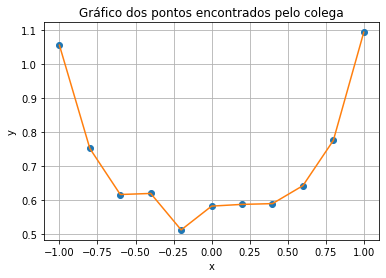

In [2]:
x = [-1.00000000000000,-0.800000000000001, -0.600000000000001,
     -0.400000000000001, -0.2000000000000, 0, 
     0.20000000000000,0.400000000000000,  0.600000000000001,
     0.800000000000001, 1.00000000000000]
y = [1.05590941787601, 0.752457362497326, 0.617299410340461, 
     0.620416269379979, 0.513290754862554, 0.583202564741593,
     0.588295869505407, 0.590493275938020, 0.643323571792085,
     0.776200142875803, 1.09392934362421]
plt.plot(x, y, 'o')
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico dos pontos encontrados pelo colega')
plt.grid(True)
plt.show()

In [3]:
poli = lagrange(x[5:8:1],y[5:8:1])
Polynomial(poli).coef

array([-0.03619873,  0.03270627,  0.58320256])

Isso quer dizer que o polinômio de lagrange para os pontos de $x_i$ em $0$, $0,2$ e $0,4$ com seu respectivo $f(x_i)$ é: $$P_2(x) = -0.03619873x^2+  0.03270627x +  0.58320256$$

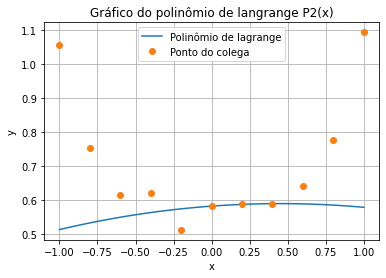

In [4]:
def P2(x):
    return -0.03619873*x**2+  0.03270627*x + 0.58320256
x = np.linspace(-1,1,30)
y = P2(x)
plt.plot(x, y, label = 'Polinômio de lagrange')
x = [-1.00000000000000,-0.800000000000001, -0.600000000000001,
     -0.400000000000001, -0.2, 0, 0.2,0.4, 0.600000000000001, 
     0.800000000000001, 1]
y = [1.05590941787601, 0.752457362497326, 0.617299410340461, 
     0.620416269379979, 0.513290754862554,0.583202564741593,
     0.588295869505407, 0.590493275938020, 0.643323571792085,
     0.776200142875803, 1.09392934362421]
plt.plot(x, y, 'o', label = 'Ponto do colega')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico do polinômio de langrange P2(x)')
plt.grid(True)
plt.legend()
plt.show()

Ajustando a função e integrando, temos: 

\begin{equation}
\int_{-1}^{1}P_2(x)dx = \int_{-1}^{1}{\left (\frac{-3619873x^2}{100000000}+\frac{3270627x}{100000000}+\frac{455627}{781250}  \right )}dx \\ =
 -\frac{3619873}{100000000}\int_{-1}^{1}x^2dx
+\frac{3270627}{100000000}\int_{-1}^{1}xdx
+\frac{455627}{781250}\int_{-1}^{1}1dx \\ \text{resolvendo temos que } \int_{-1}^{1}P_2(x)dx =  \frac{34268179}{30000000} \approx 1.142272633333333
\end{equation}

In [5]:
def g0(x):
    return np.ones(len(x))
def g1(x):
    return x
def g2(x):
    return x**2
def g3(x):
    return x**3
def g4(x):
    return x**4
x = np.array([-1.00000000000000,-0.800000000000001, -0.600000000000001,
              -0.400000000000001,-0.2, 0, 0.2,0.4, 0.600000000000001, 
              0.800000000000001, 1])
y = np.array([1.05590941787601, 0.752457362497326, 0.617299410340461, 
              0.620416269379979, 0.513290754862554, 0.583202564741593,
              0.588295869505407, 0.590493275938020, 0.643323571792085, 
              0.776200142875803, 1.09392934362421])
VT = np.array([g0(x), g1(x),g2(x),g3(x),g4(x)])
V = VT.T
M = VT@V
w = VT@y
a = np.linalg.solve(M,w)
a

array([ 0.57236414,  0.01609314, -0.02084416,  0.00154834,  0.52046948])

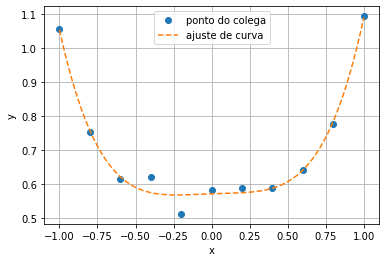

In [6]:
def f(x):
    return a[0]+a[1]*x+a[2]*x**2+a[3]*x**3+a[4]*x**4

t = np.linspace(-1,1, 100)
plt.plot(x,y,'o',label = 'ponto do colega')
plt.plot(t,f(t),'--',label='ajuste de curva')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

Integrando o polinômio $0.71225618 + 0.01719556x$ temos:
$$ 
\int_{-1}^{1}P1(x)dx = \int_{-1}^{1}0.71225618 + \int_{-1}^{1} 0.01719556x = \\
\left. (0.71225618x + \frac{0.01719556x^2}{2}) \right\rvert_{-1}^{1} \\
\int_{-1}^{1}P1(x)dx \approx 1.424512360000001
$$ 


Extra: encontrando o resíduo com $$R = \sum_{j=1}^N (f(x_j)-y_j)^2$$.

<hr><b>2.</b> <br> 

In [7]:
def g0(x):
    return np.ones(len(x))
def g1(x):
    return x
x = np.array([0.1, 0.5, 1, 2])
y = np.array([0.13, 0.57, 1.46, 5.05])
VT = np.array([g0(x), g1(x)])
V = VT.T
M = VT@V
w = VT@y
a = np.linalg.solve(M,w)

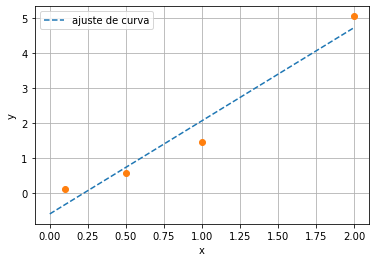

In [8]:
def f(x):
    return a[0]+a[1]*x

t = np.linspace(0,2, 30)
plt.plot(t,f(t),'--',label='ajuste de curva')
plt.plot(x,y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
def f1(x):
    b = 1
    return a[1]*x*np.exp(b) + a[0]
print(('a = {:3f}, b = {:3f}'.format((0.13-f1(0))/(0.1*np.exp(1)),f1(0))))

a = 2.647366, b = -0.589629


<hr><b>3.</b> <br> 

In [10]:
x = np.array([0.00000000000000, 0.483321946706123,0.966643893412245,
              1.44996584011837, 1.93328778682449, 2.41660973353061,
              2.89993168023673, 3.38325362694286, 3.86657557364898,
              4.34989752035510,4.83321946706122,5.31654141376735,
              5.79986336047347])
y = np.array([0.00000000000000,0.107574742143777,0.661878922629082,
              0.855709863441852,-0.524865834132117,-0.284358175257829,
              0.203315996651341,0.215404539009463,-0.455663625168619,
              0.0673119951060913,0.972537448097858,-0.00717738010111779,
              -0.369482154887155])
def f(x):
    return (a[0]+a[1]*x+a[2]*x**2+a[3]*x**3+a[4]*x**4+a[5]*x**5+a[6]*x**6+
a[7]*x**7+a[8]*x**8+a[9]*x**9+a[10]*x**10+a[11]*x**11+a[12]*x**12+a[13]*x**13)

In [11]:
def g0(x):
    return np.ones(len(x))
def g1(x):
    return x
def g2(x):
    return x**2
def g3(x):
    return x**3
def g4(x):
    return x**4
def g5(x):
    return x**5
def g6(x):
    return x**6
def g7(x):
    return x**7
def g8(x):
    return x**8
def g9(x):
    return x**9
def g10(x):
    return x**10
def g11(x):
    return x**11
def g12(x):
    return x**12
def g13(x):
    return x**13

In [12]:
VT = np.array([g0(x), g1(x), g2(x), g3(x), g4(x), g5(x), g6(x),g7(x), 
               g8(x), g9(x), g10(x), g11(x), g12(x), g13(x)])
V = VT.T
M = VT@V
w = VT@y
a = np.linalg.solve(M,w)
a

array([ 5.60550745e-04,  2.46971761e+01, -1.33449293e+02,  2.82496730e+02,
       -3.11192846e+02,  2.04972588e+02, -8.89805635e+01,  2.80139634e+01,
       -7.06632663e+00,  1.49811612e+00, -2.51809127e-01,  2.95914884e-02,
       -2.07349659e-03,  6.41150271e-05])

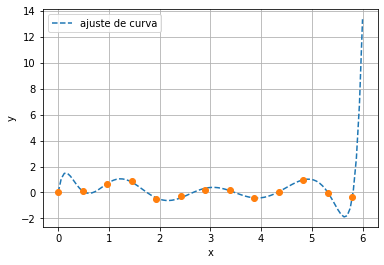

In [13]:
t = np.linspace(0,6, 100)
plt.plot(t,f(t),'--',label='ajuste de curva')
plt.plot(x,y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

Utilizando um ajuste de curvas de grau equialente ao número d e dados(13), foi possível fazer uma curva onde os pontos tocam a tocam. 